<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Feature Scaling

Continuando con nuestro proyecto en AutoRenew, la empresa de coches de segunda mano, en este laboratorio abordarás una fase crucial del preprocesamiento de datos: el **Feature Scaling**. Este paso es esencial para asegurar que todas las características (variables) de los coches se encuentren en la misma escala antes de entrenar los modelos de Machine Learning. Esto evitará que algunas características dominen sobre otras debido a sus rangos de valores diferentes, mejorando así la precisión del modelo predictivo que estás desarrollando.

Tu tarea en este laboratorio es aplicar técnicas de Feature Scaling a las características del conjunto de datos que consideres relevantes. Este paso es fundamental para preparar los datos de manera adecuada para el entrenamiento de modelos de Machine Learning, lo que haremos en los próximos ejercicios.

**Columnas del conjunto de datos que podrías escalar:**

- **price**: Precio del coche.

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **kilometer**: Kilometraje total del coche.

- **yearOfRegistration**: Año de registro del coche (aunque es una característica temporal, en algunos casos puede necesitar escalado dependiendo del enfoque del modelo).

- **monthOfRegistration**: Mes de registro del coche.

**Instrucciones:**

1. **Identificación de las características a escalar:** Revisa el conjunto de datos y selecciona las columnas que deberían ser escaladas. Estas generalmente incluyen características numéricas continuas como el precio, la potencia y el kilometraje.

2. **Aplicación de técnicas de Feature Scaling**


3. **Comparación de resultados:** Después de aplicar el escalado, observa cómo han cambiado las distribuciones de las características. Evalúa cuál de las técnicas de escalado es más apropiada para este conjunto de datos y justifica tu elección.

**Nota:** Este laboratorio se construye sobre el análisis exploratorio y la gestión de nulos que realizaste anteriormente. Asegúrate de mantener una buena documentación de tus procesos, ya que utilizaremos estos datos escalados en las próximas etapas de modelado de Machine Learning.


In [47]:
# Para gestionar el feature scaling
# -----------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import math

In [48]:
df_num = pd.read_csv("../../datos/df_numericas_nonulos.csv", index_col = 0)
df_original = df = pd.read_csv("../../datos/autorenew.csv", index_col = 0)

In [49]:
df_num = df_num.drop(columns = ["index.1", "index.2"])

In [64]:
df_num["price"].describe()

count    3.713460e+05
mean     1.729561e+04
std      3.588832e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64

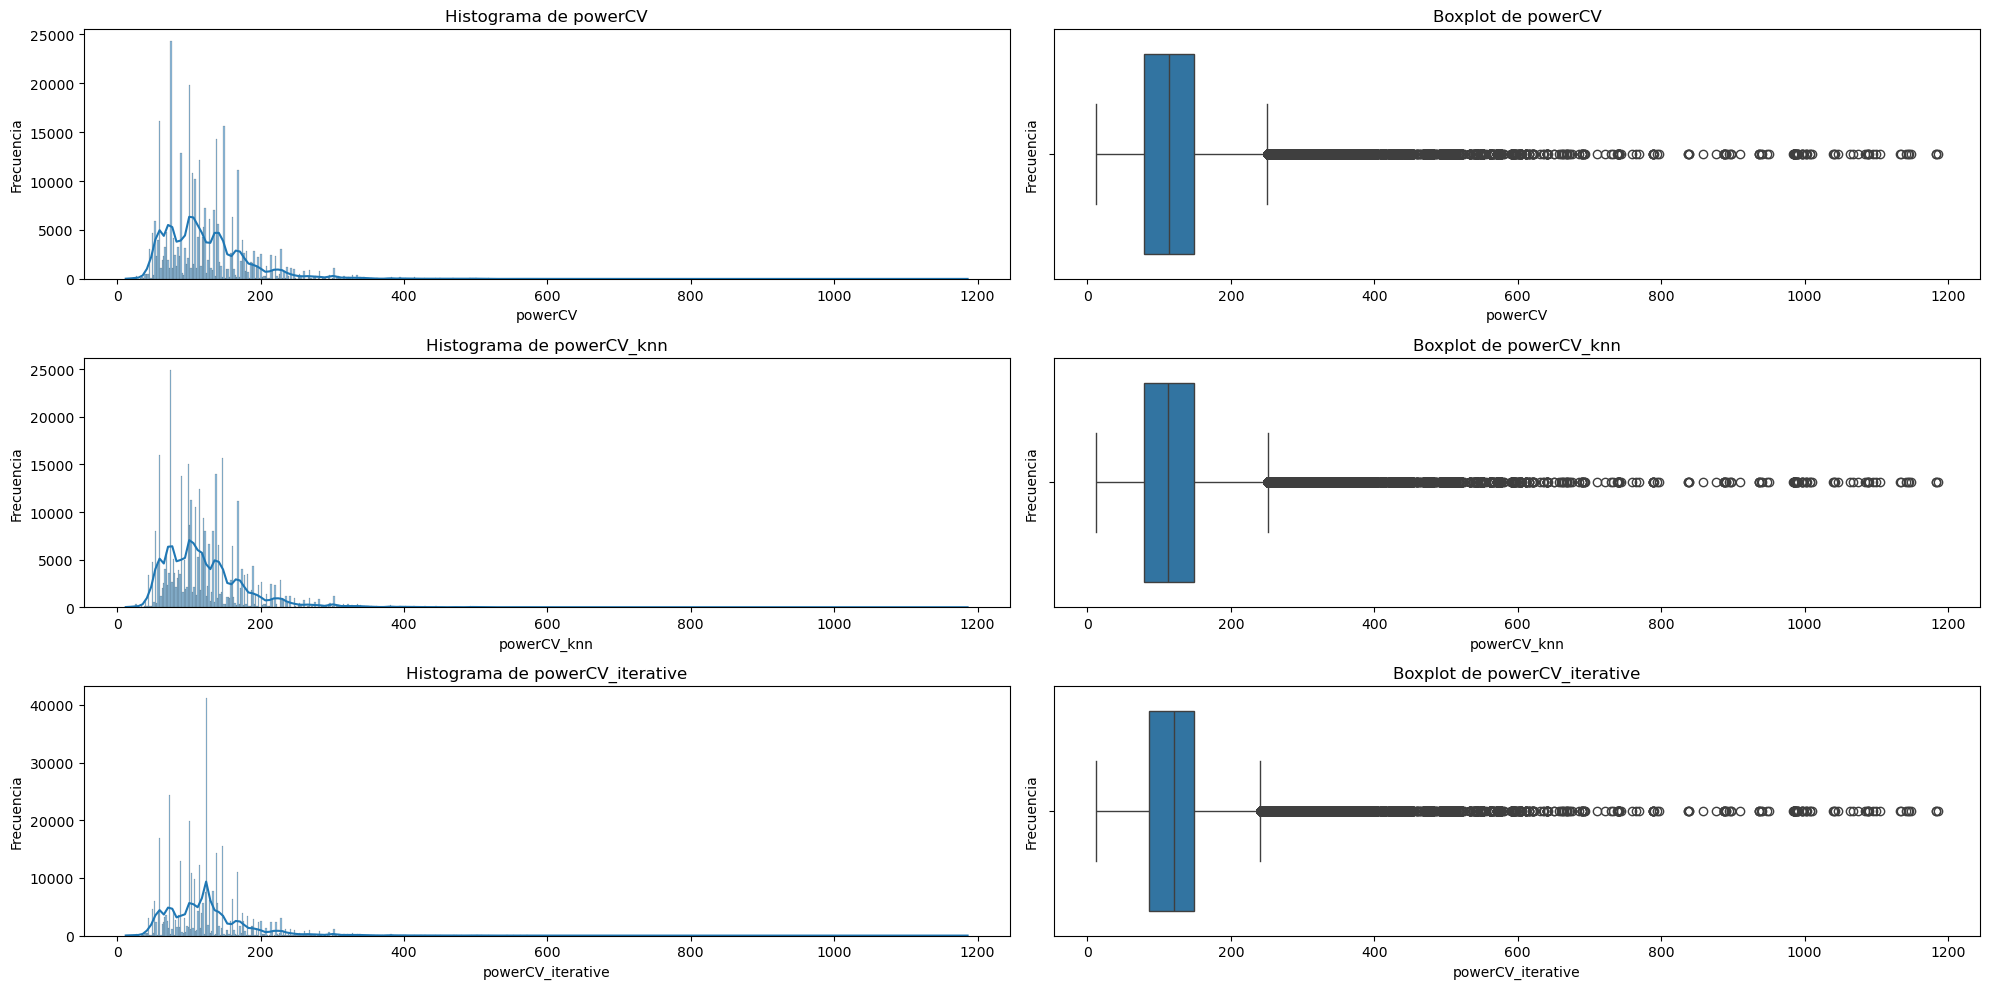

In [51]:
#CABALLOS
# Crear subgráficos 2x3 para histograma y boxplot
fig, axes = plt.subplots(3, 2, figsize=(20, 10))
axes = axes.flat  # Aplanamos el array de ejes para iterar fácilmente

# Columnas que deseas graficar
columnas_plotear = ["powerCV", "powerCV_knn", "powerCV_iterative"]

# Iterar sobre las columnas y dibujar los histogramas y boxplots en los subgráficos
for indice, columna in enumerate(columnas_plotear):
    # Primer subgráfico: Histograma
    sns.histplot(data=df_num, x=columna, kde=True, ax=axes[2*indice])
    axes[2*indice].set_title(f'Histograma de {columna}')  
    axes[2*indice].set_xlabel(columna)  
    axes[2*indice].set_ylabel('Frecuencia')

    # Segundo subgráfico: Boxplot
    sns.boxplot(data=df_num, x=columna, ax=axes[2*indice+1])
    axes[2*indice+1].set_title(f'Boxplot de {columna}')  
    axes[2*indice+1].set_xlabel(columna)  
    axes[2*indice+1].set_ylabel('Frecuencia')

# Ajustamos el layout para evitar solapamientos
plt.tight_layout()
plt.show()

#Elegiremos el KNN porque es el que mas se adapta a la distribución original, a ojo

In [65]:
# Comenzamos con las núméricas:

#Robustas
escalador_robust = RobustScaler()

columnas = ["price_knn","price_iterative", "powerCV_iterative", "powerCV_knn"]

for columna in columnas:
    datos_transf_robust = escalador_robust.fit_transform(df_num[[columna]])  
    df_num[f"{columna}_robust"] = datos_transf_robust  


#Minmax
escalador_min_max = MinMaxScaler()

# Iteramos sobre las columnas para aplicar el escalado
for columna in columnas:
    datos_transf_min_max = escalador_min_max.fit_transform(df_num[[columna]])  
    df_num[f"{columna}_minmax"] = datos_transf_min_max


#Standard
escalador_stand = StandardScaler()

for columna in columnas:
    datos_transf_stand = escalador_stand.fit_transform(df_num[[columna]])  
    df_num[f"{columna}_stand"] = datos_transf_stand

In [66]:
df_num.head()

,index,price,powerCV,price_iterative,powerCV_iterative,price_knn,powerCV_knn,price_robust,powerCV_iterative_robust,powerCV_knn_robust,...,powerCV_knn_minmax,price_stand,powerCV_iterative_stand,powerCV_knn_stand,price_knn_robust,price_iterative_robust,price_knn_minmax,price_iterative_minmax,price_knn_stand,price_iterative_stand
0,0,480,NaN,480.0,124.477284,480.0,78.8,-0.408264,0.072214,-0.481159,...,0.056899,-0.004686,-0.000106,-0.716809,-0.408264,-0.408264,2.235174e-07,2.235174e-07,-0.004686,-0.004686
1,1,18300,187.0,18300.0,187.000000,18300.0,187.0,2.537190,1.080645,1.086957,...,0.149063,0.000280,1.053310,1.064639,2.537190,2.537190,8.521602e-06,8.521602e-06,0.000280,0.000280
2,2,9800,161.0,9800.0,161.000000,9800.0,161.0,1.132231,0.661290,0.710145,...,0.126917,-0.002089,0.615248,0.636565,1.132231,1.132231,4.563481e-06,4.563481e-06,-0.002089,-0.002089
3,3,1500,74.0,1500.0,74.000000,1500.0,74.0,-0.239669,-0.741935,-0.550725,...,0.052811,-0.004401,-0.850574,-0.795838,-0.239669,-0.239669,6.984919e-07,6.984919e-07,-0.004401,-0.004401
4,4,3600,68.0,3600.0,68.000000,3600.0,68.0,0.107438,-0.838710,-0.637681,...,0.047700,-0.003816,-0.951665,-0.894624,0.107438,0.107438,1.676381e-06,1.676381e-06,-0.003816,-0.003816


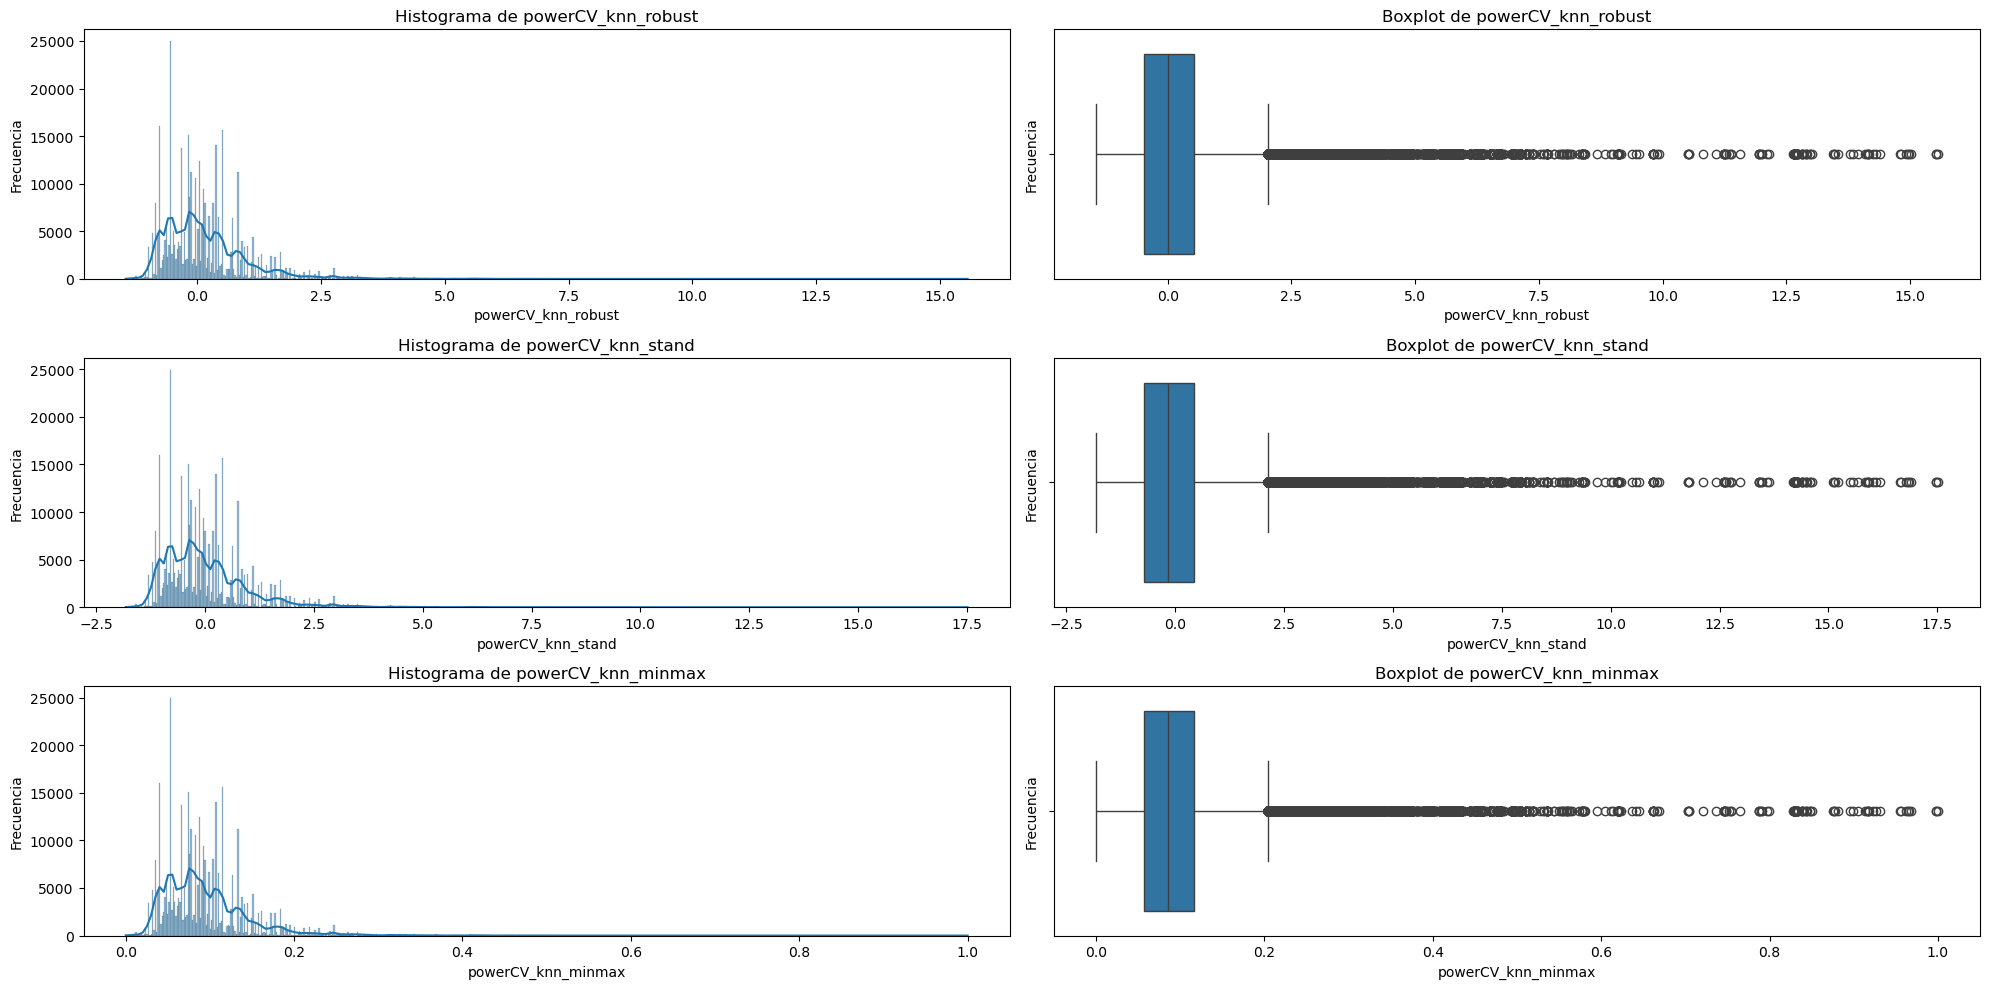

In [54]:
#CABALLOS
# Crear subgráficos 2x3 para histograma y boxplot
fig, axes = plt.subplots(3, 2, figsize=(20, 10))
axes = axes.flat  # Aplanamos el array de ejes para iterar fácilmente

# Columnas que deseas graficar
columnas_plotear = ["powerCV_knn_robust", "powerCV_knn_stand", "powerCV_knn_minmax"]

# Iterar sobre las columnas y dibujar los histogramas y boxplots en los subgráficos
for indice, columna in enumerate(columnas_plotear):
    # Primer subgráfico: Histograma
    sns.histplot(data=df_num, x=columna, kde=True, ax=axes[2*indice])
    axes[2*indice].set_title(f'Histograma de {columna}')  
    axes[2*indice].set_xlabel(columna)  
    axes[2*indice].set_ylabel('Frecuencia')

    # Segundo subgráfico: Boxplot
    sns.boxplot(data=df_num, x=columna, ax=axes[2*indice+1])
    axes[2*indice+1].set_title(f'Boxplot de {columna}')  
    axes[2*indice+1].set_xlabel(columna)  
    axes[2*indice+1].set_ylabel('Frecuencia')

# Ajustamos el layout para evitar solapamientos
plt.tight_layout()
plt.show()


Debido a la gran cantidad de outliers en ambas muestras numéricas, Encontramos que el método minmax no es óptimo para realizar escalamiento. Asimismo, el método estándar tampoco resulta satisfactifactorio pues desdeña el valor de los numerosos outliers,que encontrando valores tan diversos, considero que pueden aportar información importante. Por tanto y por los citados motivos, el método más optimo es el robusto.

In [67]:
df_fin = df_num[["price_knn", "powerCV_knn_robust"]]

df_fin.to_csv("../../datos/df_datosrobustos.csv")